Download historical data from EIA and NOAA/GHCN-d to the local filesystem

In [1]:
import download_historical_data as dl
import os 

HISTORICAL_DATA_DIR = os.path.abspath("./historical_data")
ELECTRIC_DATA_DIR = os.path.join(HISTORICAL_DATA_DIR, "electric_data")
WEATHER_DATA_DIR = os.path.join(HISTORICAL_DATA_DIR, "weather_station_data")
WEATHER_STATION_IDS = [
    "USW00023066",  # Grand Junction Walker Field
    "USC00053553",  # Greeley UNC
    "USC00053005",  # Ft Collins
    "USC00050848",  # Boulder
    "USC00055984",  # Northglenn
    "USC00058995",  # Wheat Ridge
    "USW00023061"  # Alamosa
]
dl.download_historical_data(ELECTRIC_DATA_DIR, WEATHER_DATA_DIR, WEATHER_STATION_IDS, eia_respondent="PSCO")

Writing EIA demand data to c:\Users\breis\projects\e-predict\historical_data\electric_data\PSCO.json...
Completed downloading EIA demand data
Finished downloading data


Parse station observations data 

In [3]:
import os
from ghcnd.station_observations import read_from_dly_file

station_data = [read_from_dly_file(os.path.join(WEATHER_DATA_DIR, f)) for f in os.listdir(WEATHER_DATA_DIR)]

first_station = station_data[0]
first_station_obs = first_station.observations[0]
print(f"{first_station.station_id}: {first_station_obs.date} tmax={first_station_obs.tmax} tmin={first_station_obs.tmin}")


USC00050848: 2015-01-01 tmax=0 tmin=-144


Import station observations data in Pandas DataFrame

In [4]:
import pandas as pd
import matplotlib as plt
from datetime import date

obs = station_data[0].observations

df = pd.DataFrame(obs)
df["date"] = pd.to_datetime(df["date"])
df = df.assign(day_of_year=lambda x: x["date"].dt.day_of_year)

df.set_index("date", inplace=True)

df = df.interpolate(method="time")

df = df.assign(
    tmax_decimal=lambda x: x["tmax"] / 10.0,
    tmin_decimal=lambda x: x["tmin"] / 10.0)

Plot temp min/max

<AxesSubplot: xlabel='date'>

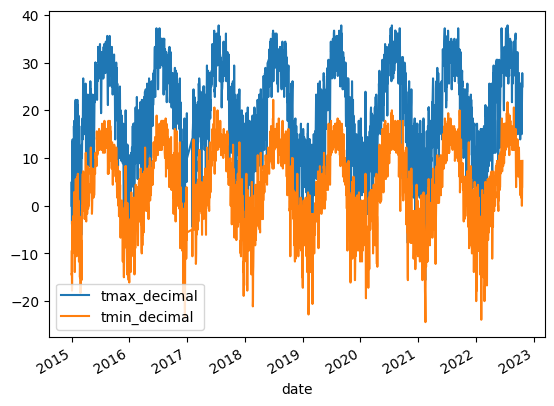

In [5]:
df.plot(y=["tmax_decimal", "tmin_decimal"])

Just mess around

In [6]:
df.describe()

,tmax,tmin,day_of_year,tmax_decimal,tmin_decimal
count,2820.000000,2820.000000,2820.000000,2820.000000,2820.000000
mean,196.721277,36.272872,181.264539,19.672128,3.627287
std,101.839623,84.997154,103.238148,10.183962,8.499715
min,-156.000000,-244.000000,1.000000,-15.600000,-24.400000
25%,122.000000,-28.000000,92.750000,12.200000,-2.800000
50%,206.000000,39.000000,181.000000,20.600000,3.900000
75%,283.000000,111.000000,269.000000,28.300000,11.100000
max,378.000000,222.000000,366.000000,37.800000,22.200000
